In [20]:
import pickle
import numpy as np
import json, codecs
import os, glob

out_path = 'SceneEgo_folder/EgocentricDepthEstimator_ALL_SUCCESS/data/out'

file_path = "output_skeleton_video.json" 

heatmap_sequence = ["Neck", "Right_shoulder", "Right_elbow", "Right_wrist", "Left_shoulder", "Left_elbow",
                        "Left_wrist", "Right_hip", "Right_knee", "Right_ankle", "Right_foot", "Left_hip",
                        "Left_knee", "Left_ankle", "Left_foot"]
lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]

dict_json = {}
for filename in glob.glob(os.path.join(out_path, '*.jpg.pkl')):
    # Pickle 파일 열기
    with open(os.path.join(os.getcwd(), filename), 'rb') as f:
        loaded_data = pickle.load(f)
        # 로드된 데이터 사용
        loaded_data = np.array(loaded_data)
        # print(loaded_data)

        dict_lines={}
        for i,j in lines:
            x1, y1, z1 = loaded_data[i]
            x2, y2, z2 = loaded_data[j]
            dict_lines['%s to %s'%(heatmap_sequence[i], heatmap_sequence[j])] = {'start_point' : [x1, y1, z1], 'end_point' :[x2, y2, z2]}
        dict_lines = {key_line:{k: list(map(float,v)) for k,v in v_line.items()} for key_line, v_line in dict_lines.items()}
        dict_json[os.path.basename(filename).split('.')[0]] = dict_lines
json.dump(dict_json, codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4) ### this saves the array in .json format

In [ ]:
dict_json

NameError: name 'loaded_data' is not defined

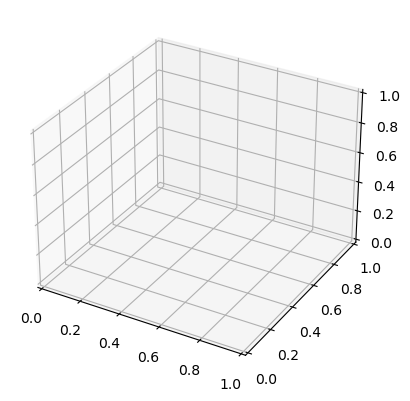

In [2]:
# %matplotlib widget
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
i=0
n=0

for x,y,z in loaded_data:
    if i == n:
        ax.scatter3D(x,y,z, color='r' )# 3D scatter plot)
    else:
        ax.scatter3D(x,y,z,color='g')
    i +=1

lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
for i,j in lines:
    x1, y1, z1 = loaded_data[i]
    x2, y2, z2 = loaded_data[j]
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-')  # 'b-'는 파란색 실선을 의미합니다.

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(0,1.8)

# Z 축의 방향을 바꿉니다.
ax.invert_zaxis()
# fig.savefig("output_img.png")
plt.show()
# fig2,ax2 = plt.subplots()
# plt.imshow(img)

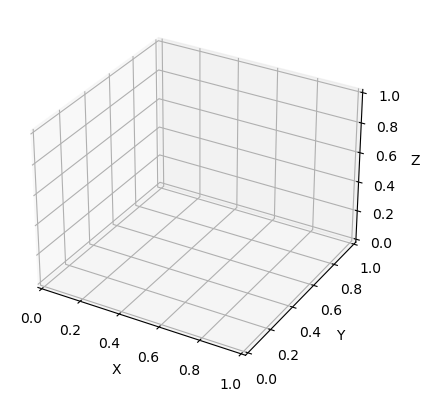

In [4]:

# Once Loop Reflect

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()
